In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
pData = pd.read_csv('parameter_Data.csv')

In [118]:
pData.head()

,Name,front,rear,Cd
0,DP 0,0.10000,30.000,0.173938
1,DP 1,0.10000,29.975,0.174835
2,DP 2,0.10005,29.850,0.170985
3,DP 3,0.10010,30.000,0.172906
4,DP 4,0.10015,30.125,0.172575


In [119]:
pData.describe()

,front,rear,Cd
count,238.000000,238.000000,238.000000
mean,0.108555,31.522269,0.174337
std,0.005155,0.865400,0.005270
min,0.100000,29.850000,0.161737
25%,0.104087,30.781250,0.170470
50%,0.108550,31.525000,0.174536
75%,0.113013,32.268750,0.178015
max,0.117400,33.000000,0.190050


In [120]:
pData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    238 non-null    object 
 1   front   238 non-null    float64
 2   rear    238 non-null    float64
 3   Cd      238 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.6+ KB


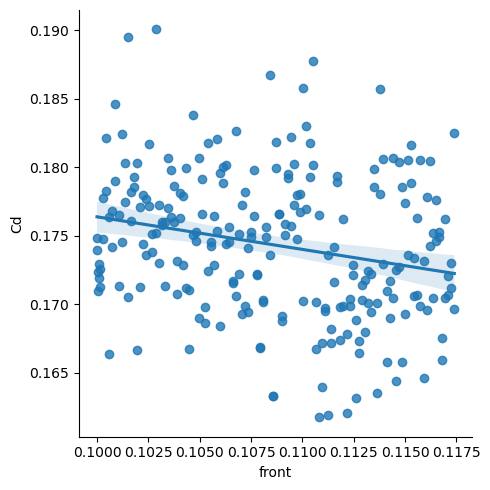

In [121]:
sns.lmplot(data = pData, x = 'front', y = 'Cd')

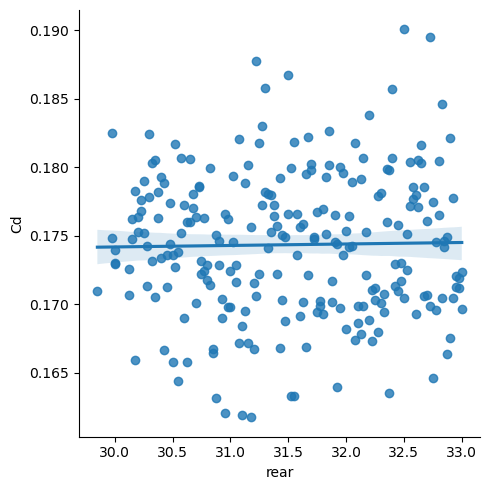

In [122]:
sns.lmplot(data = pData, x = 'rear', y = 'Cd')

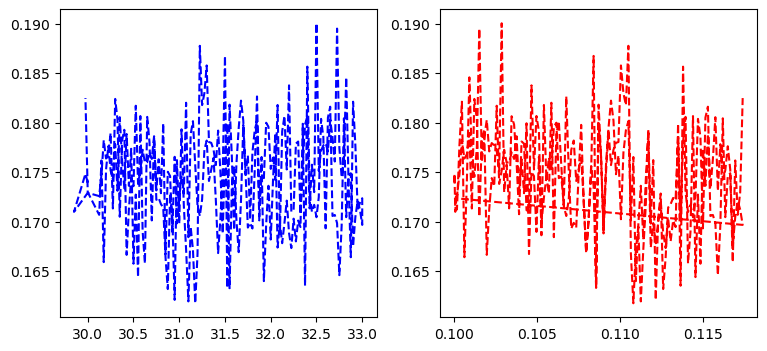

In [123]:
x = pData['rear']
y = pData['Cd']
z = pData['front']
fig,axes = plt.subplots(1,2,figsize=(9,4))
axes[0].plot(x,y,ls="--",color='b')
axes[1].plot(z,y,ls="--",color='r')

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X = pData[['rear','front']].values
y = pData['Cd'].values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lm = LinearRegression()

In [129]:
lm.fit(X_train, y_train)

LinearRegression()

In [130]:
lm.coef_

array([ 2.44917575e-04, -2.72418544e-01])

In [131]:
Predictions = lm.predict(X_test)

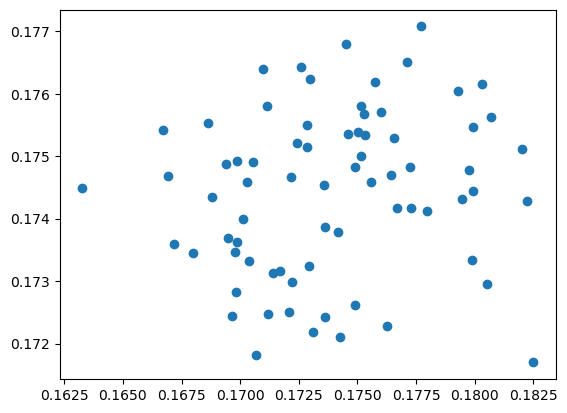

In [132]:
plt.scatter(y_test, Predictions)

In [133]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, Predictions)

0.003289678096027882

In [134]:
metrics.mean_squared_error(y_test, Predictions)

1.754123900702582e-05

In [135]:
np.sqrt(metrics.mean_squared_error(y_test, Predictions))

0.004188226236370932

C:\Users\K Sankar Rao\AppData\Local\Temp\ipykernel_30160\1512787378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-Predictions),bins=50)


<Axes: ylabel='Density'>

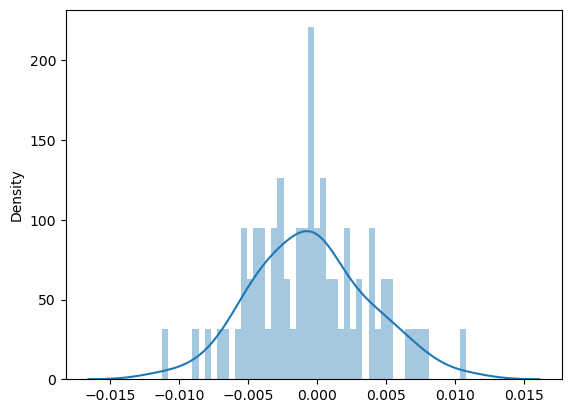

In [136]:
sns.distplot((y_test-Predictions),bins=50)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
new_data = np.array([[29.47665,0.091911], [29.575, 0.1015], [31.275, 0.1045], [30.675, 0.1055], [28.975, 0.10875], [32.25, 0.1095]])

In [139]:
new_data

array([[29.47665 ,  0.091911],
       [29.575   ,  0.1015  ],
       [31.275   ,  0.1045  ],
       [30.675   ,  0.1055  ],
       [28.975   ,  0.10875 ],
       [32.25    ,  0.1095  ]])

In [140]:
pred = lm.predict(new_data)

In [141]:
pred

array([0.17851817, 0.17593004, 0.17552914, 0.17510977, 0.17380805,
       0.17440584])

In [142]:
## using scipy library for optimization 

In [143]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

In [144]:
model = LinearRegression()

In [145]:
## function to minimize the SSE
def objective(par):
    model.coef_ = par[:2]
    model.intercept_ = par[2]
    predictions_Opt = model.predict(X)
    SSE = np.mean((predictions_Opt - y) ** 2)
    return SSE

In [148]:
## initial guess for parameters

In [149]:
initial_par = np.zeros(3)

In [150]:
initial_par

array([0., 0., 0.])

In [151]:
## setting target value for Cd as 0.01

In [152]:
target_value = 0.01

In [153]:
## using minimize function from scipy

In [154]:
result = minimize(objective, initial_par, bounds=[(-20, 20)] * 3, tol=target_value)

In [155]:
## optimized parameters

In [156]:
optimized_par = result.x

In [157]:
optimized_par

array([5.52091352e-03, 1.90061055e-05, 1.75140852e-04])

In [158]:
# Set the model's parameters to the optimized values
model.coef_ = optimized_par[:2]
model.intercept_ = optimized_par[2]


In [159]:
model.coef_

array([5.52091352e-03, 1.90061055e-05])

In [160]:
model.intercept_

0.00017514085169603182

In [161]:
## predictions with the optimized model
new_data_S = np.array([[29.47665,0.091911], [29.575, 0.1015], [31.275, 0.1045], [30.675, 0.1055], [28.975, 0.10875], [32.25, 0.1095]])
optimized_prediction = model.predict(new_data_S)

In [162]:
print("Optimized Coefficients:", model.coef_)
print("Optimized Intercept:", model.intercept_)
print("Optimized Prediction:", optimized_prediction)


Optimized Coefficients: [5.52091352e-03 1.90061055e-05]
Optimized Intercept: 0.00017514085169603182
Optimized Prediction: [0.16291492 0.16345809 0.1728437  0.16953117 0.16014568 0.17822668]


In [163]:
## plotting

In [170]:
X = new_data_S[:,1]

In [171]:
X

array([0.091911, 0.1015  , 0.1045  , 0.1055  , 0.10875 , 0.1095  ])

In [174]:
za = np.array([[0.17013,0.17151,0.17133,0.17985,0.1861,0.17794]])

In [175]:
za

array([[0.17013, 0.17151, 0.17133, 0.17985, 0.1861 , 0.17794]])

In [172]:
from mpl_toolkits.mplot3d import Axes3D

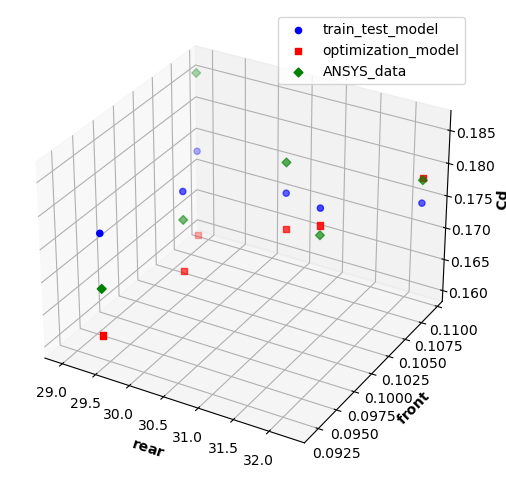

In [182]:
xl = new_data_S[:,0]
yl = new_data_S[:,1]
zl = pred
zo = optimized_prediction
za = np.array([[0.17013,0.17151,0.17133,0.17985,0.1861,0.17794]])
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xl, yl, zl, c='blue', marker='o', label='train_test_model')
ax.scatter(xl, yl, zo, c='red', marker='s', label='optimization_model')
ax.scatter(xl, yl, za, c='green', marker='D', label='ANSYS_data')
ax.set_xlabel(r'$\mathbf{rear}$', weight='bold') 
ax.set_ylabel(r'$\mathbf{front}$', weight='bold')
ax.set_zlabel(r'$\mathbf{Cd}$', weight='bold')

# Add a legend
ax.legend(prop={'size': 10})

# Show the plot
plt.show()

In [ ]:
## WE CAN SEE THE OPTIMIZED MODEL GIVES THE MINIMUM VALUE FOR COEFFICIENT OF DRAG, WHEN COMPARED TO TRAIN_TEST_MODEL.